In [21]:
null_values_count = df.isnull().sum()
print("Count of null values per column:")
print(null_values_count)

Count of null values per column:
transaction_id       0
transaction_date     0
customer_id          0
Customer_Name        0
Customer_Category    0
store_id             0
City                 0
Store_Type           0
promotion_id         1
Promotion            0
product_id           1
product_name         1
quantity             1
unit_price           1
line_gross_amount    1
line_discount        1
line_net_amount      1
total_items          1
total_cost           1
payment_method       1
discount_applied     1
season               1
loyalty_status       1
dtype: int64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [3]:
num_cols = [
    "unit_price",
    "line_gross_amount",
    "line_discount",
    "line_net_amount",
    "total_items",
    "total_cost"
]

df[num_cols].describe()


,unit_price,line_gross_amount,line_discount,line_net_amount,total_items,total_cost
count,772575.000000,772575.000000,772575.000000,772575.000000,772575.000000,772575.000000
mean,13.493354,13.493354,1.349335,12.144018,5.497338,52.452629
std,6.638936,6.638936,0.663894,5.975042,2.873057,27.422560
min,2.000000,2.000000,0.200000,1.800000,1.000000,5.000000
25%,7.750000,7.750000,0.775000,6.975000,3.000000,28.790000
50%,13.490000,13.490000,1.349000,12.141000,5.000000,52.380000
75%,19.240000,19.240000,1.924000,17.316000,8.000000,76.200000
max,25.000000,25.000000,2.500000,22.500000,10.000000,100.000000


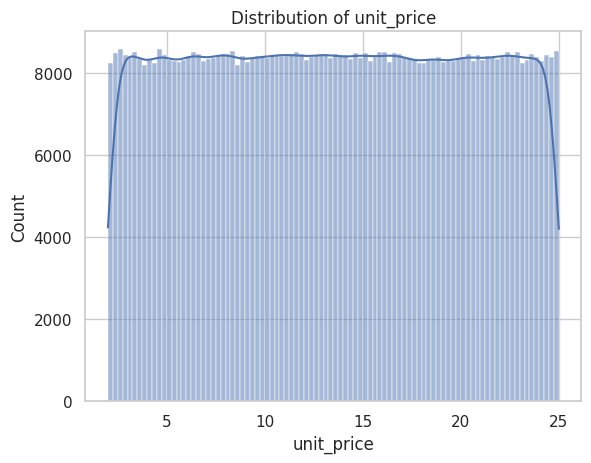

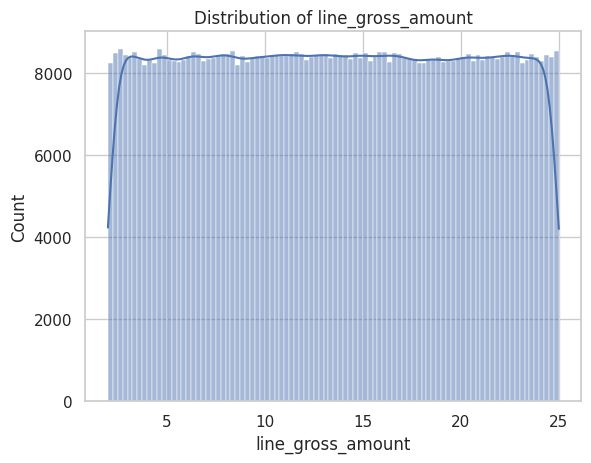

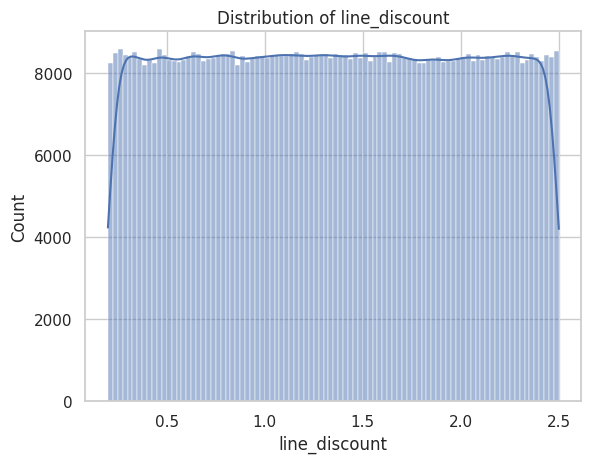

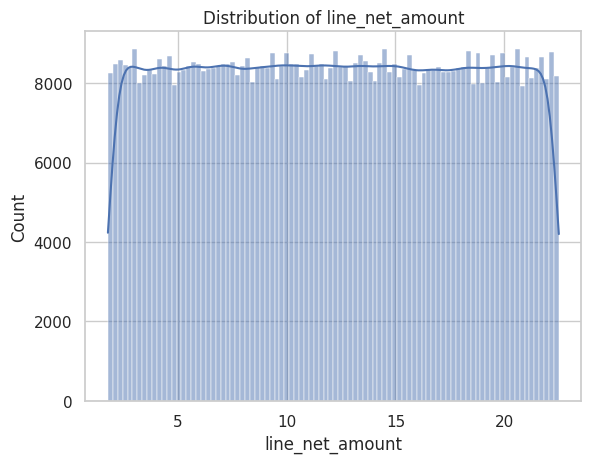

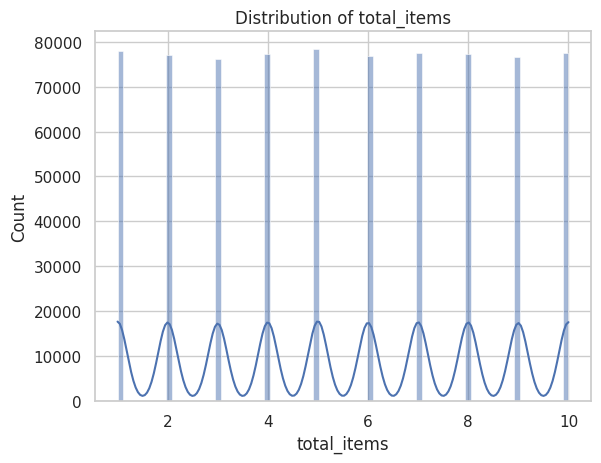

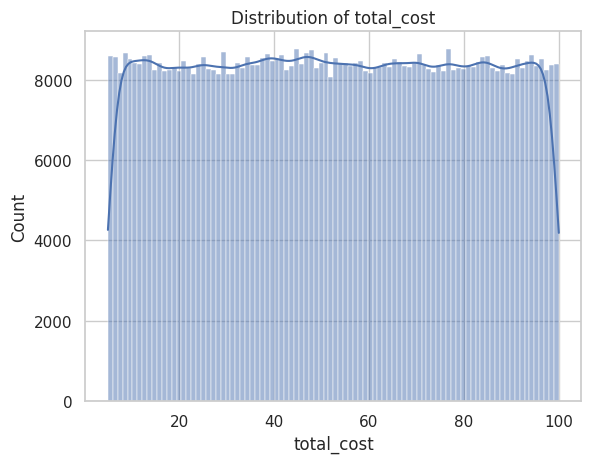

In [4]:
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [5]:
cat_cols = [
    "Customer_Category",
    "City",
    "Store_Type",
    "Promotion",
    "payment_method",
    "season",
    "loyalty_status",
    "discount_applied"
]


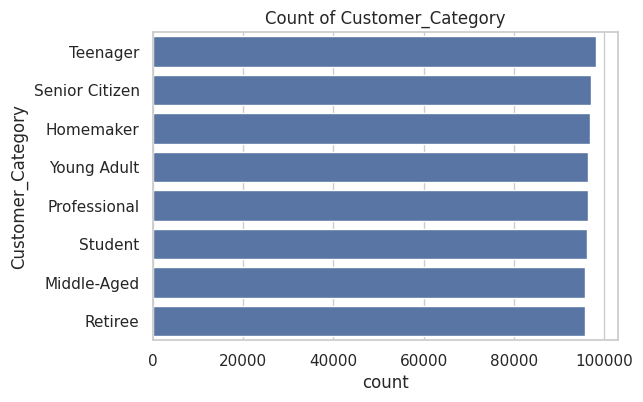

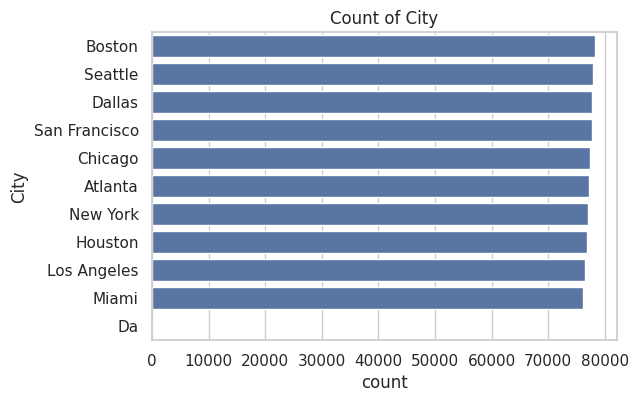

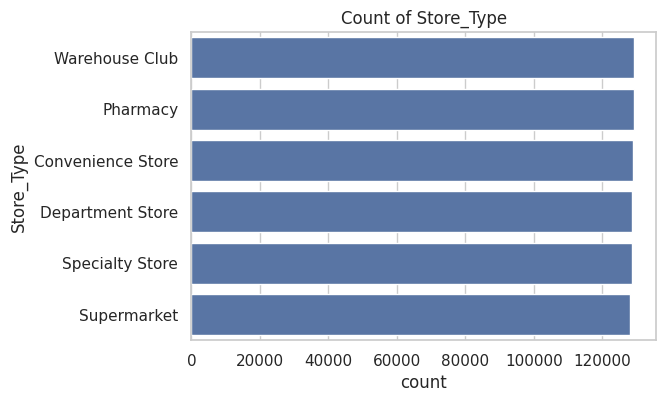

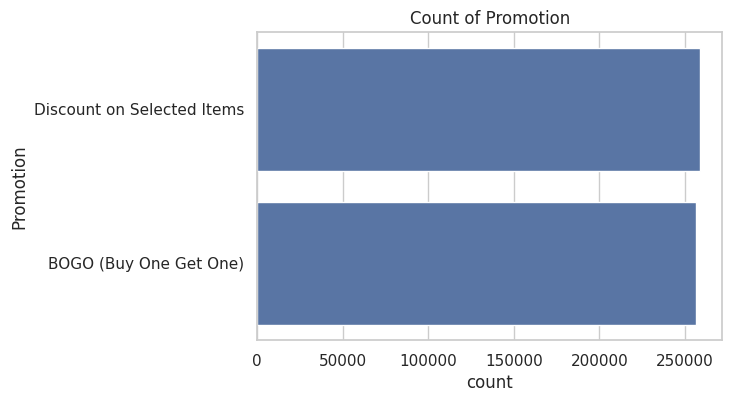

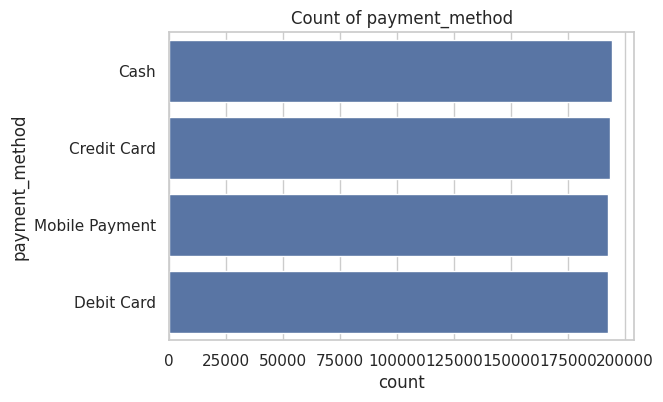

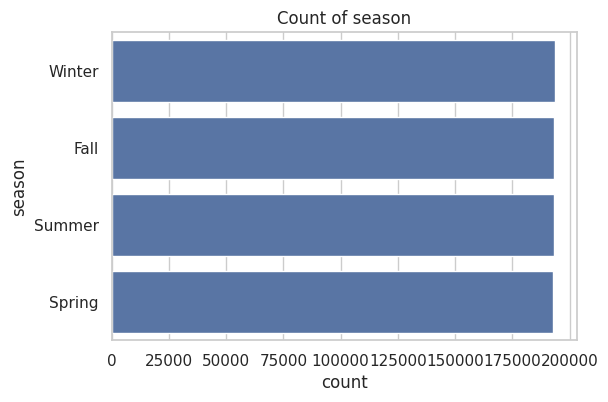

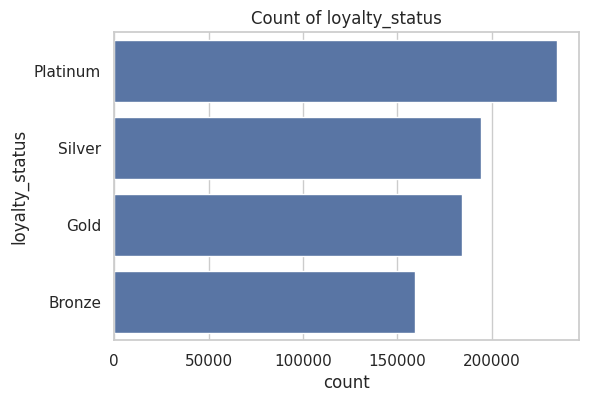

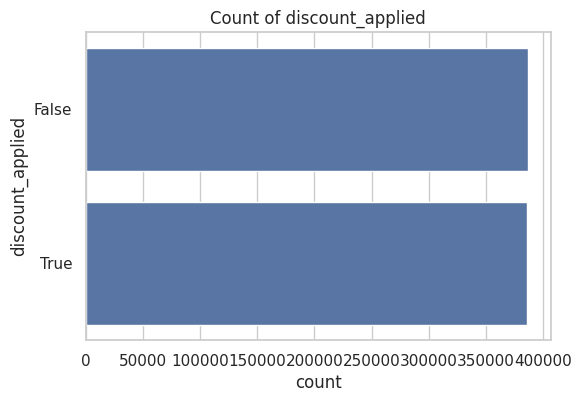

In [6]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.show()


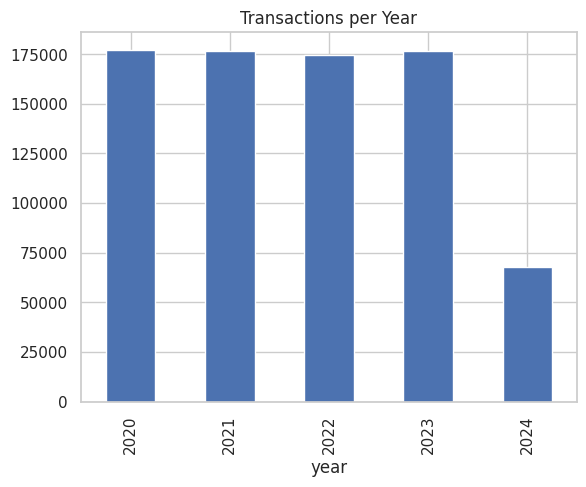

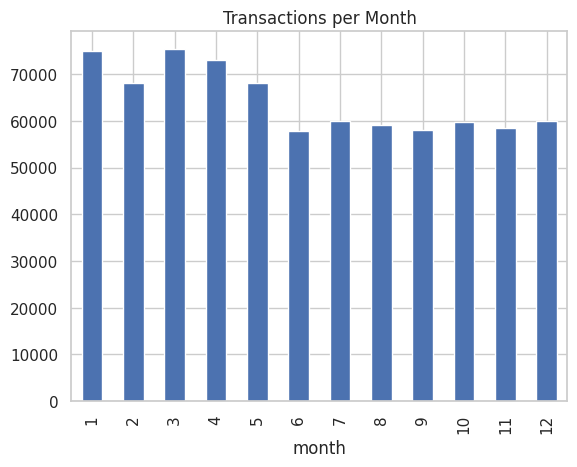

In [7]:
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

df["year"] = df["transaction_date"].dt.year
df["month"] = df["transaction_date"].dt.month

df.groupby("year").size().plot(kind="bar", title="Transactions per Year")
plt.show()

df.groupby("month").size().plot(kind="bar", title="Transactions per Month")
plt.show()


In [25]:
# Fill null values in 'Promotion' with 'No Promotion'
df['Promotion'] = df['Promotion'].fillna('No Promotion')

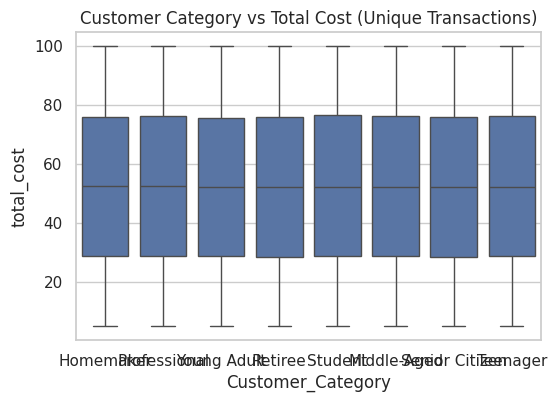

In [22]:
# Sort the DataFrame by 'transaction_id' and keep the first occurrence of each unique transaction
df_unique_transactions = df.sort_values(by='transaction_id').drop_duplicates(subset=['transaction_id'], keep='first').copy()

plt.figure(figsize=(6,4))
sns.boxplot(x="Customer_Category", y="total_cost", data=df_unique_transactions)
plt.title("Customer Category vs Total Cost (Unique Transactions)")
plt.show()

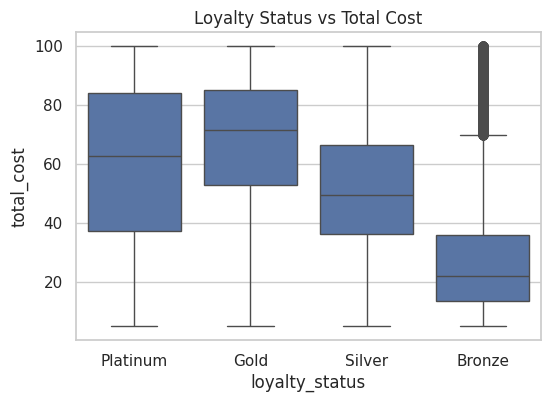

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x="loyalty_status", y="total_cost", data=df)
plt.title("Loyalty Status vs Total Cost")
plt.show()


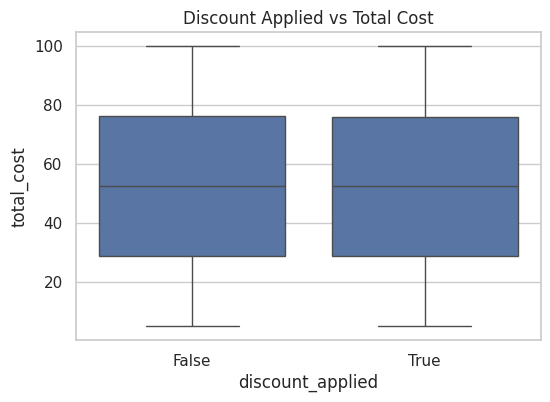

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x="discount_applied", y="total_cost", data=df)
plt.title("Discount Applied vs Total Cost")
plt.show()


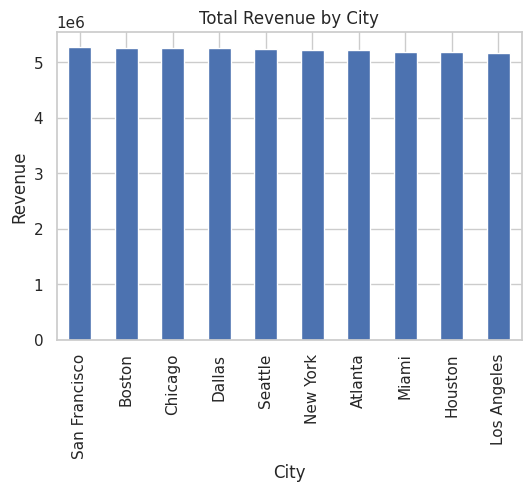

In [16]:
city_revenue = df.groupby("City")["total_cost"].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
city_revenue.plot(kind="bar")
plt.title("Total Revenue by City")
plt.ylabel("Revenue")
plt.show()


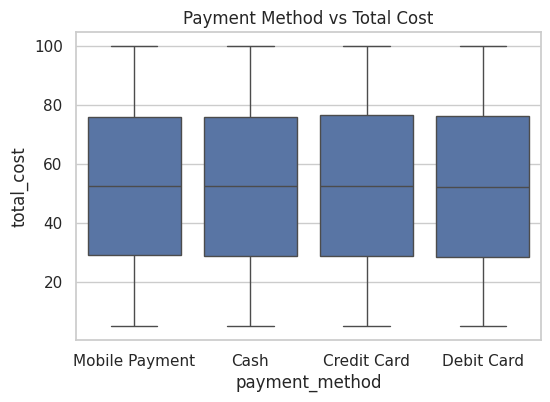

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x="payment_method", y="total_cost", data=df)
plt.title("Payment Method vs Total Cost")
plt.show()


In [18]:
line_check = df.groupby("transaction_id").agg({
    "line_net_amount": "sum",
    "total_cost": "first"
})

line_check["difference"] = line_check["total_cost"] - line_check["line_net_amount"]

line_check.head()


,line_net_amount,total_cost,difference
transaction_id,,,
1000000000,38.124,71.65,33.526
1000000001,35.235,25.93,-9.305
1000000002,8.469,41.49,33.021
1000000003,19.809,39.34,19.531
1000000004,11.790,16.42,4.630


In [19]:
line_check["difference"].abs().describe()


,difference
count,332383.00000
mean,30.66888
std,21.66354
min,0.00000
25%,12.60500
50%,26.94000
75%,45.35700
max,98.01100


In [23]:
display(df.head())

,transaction_id,transaction_date,customer_id,Customer_Name,Customer_Category,store_id,City,Store_Type,promotion_id,Promotion,...,unit_price,line_gross_amount,line_discount,line_net_amount,total_items,total_cost,payment_method,discount_applied,season,loyalty_status
0,1000000000,2022-01-21 06:27:29,1,Stacey Price,Homemaker,1,Los Angeles,Warehouse Club,1.0,No Promotion,...,15.91,15.91,1.591,14.319,3.0,71.65,Mobile Payment,True,Winter,Platinum
1,1000000000,2022-01-21 06:27:29,1,Stacey Price,Homemaker,1,Los Angeles,Warehouse Club,1.0,No Promotion,...,12.55,12.55,1.255,11.295,3.0,71.65,Mobile Payment,True,Winter,Platinum
2,1000000000,2022-01-21 06:27:29,1,Stacey Price,Homemaker,1,Los Angeles,Warehouse Club,1.0,No Promotion,...,13.90,13.90,1.390,12.510,3.0,71.65,Mobile Payment,True,Winter,Platinum
3,1000000001,2023-03-01 13:01:21,2,Michelle Carlson,Professional,2,San Francisco,Specialty Store,2.0,BOGO (Buy One Get One),...,3.16,3.16,0.316,2.844,2.0,25.93,Cash,True,Fall,Platinum
4,1000000001,2023-03-01 13:01:21,2,Michelle Carlson,Professional,2,San Francisco,Specialty Store,2.0,BOGO (Buy One Get One),...,9.37,9.37,0.937,8.433,2.0,25.93,Cash,True,Fall,Platinum


In [24]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/denormalized_transactions (2).csv')

conditions = [
    df['discount_applied'].astype(str).str.lower().isin(['true', '1']),
    df['discount_applied'].astype(str).str.lower().isin(['false', '0'])
]
choices = [True, False]

df['discount_applied'] = np.select(conditions, choices, default=np.nan)

df['discount_applied'] = df['discount_applied'].fillna(False).astype(bool)

display(df.head())

/tmp/ipython-input-4262597011.py:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/denormalized_transactions (2).csv')


,transaction_id,transaction_date,customer_id,Customer_Name,Customer_Category,store_id,City,Store_Type,promotion_id,Promotion,...,unit_price,line_gross_amount,line_discount,line_net_amount,total_items,total_cost,payment_method,discount_applied,season,loyalty_status
0,1000000000,2022-01-21 06:27:29,1,Stacey Price,Homemaker,1.0,Los Angeles,Warehouse Club,1.0,NaN,...,15.91,15.91,1.591,14.319,3.0,71.65,Mobile Payment,True,Winter,Platinum
1,1000000000,2022-01-21 06:27:29,1,Stacey Price,Homemaker,1.0,Los Angeles,Warehouse Club,1.0,NaN,...,12.55,12.55,1.255,11.295,3.0,71.65,Mobile Payment,True,Winter,Platinum
2,1000000000,2022-01-21 06:27:29,1,Stacey Price,Homemaker,1.0,Los Angeles,Warehouse Club,1.0,NaN,...,13.90,13.90,1.390,12.510,3.0,71.65,Mobile Payment,True,Winter,Platinum
3,1000000001,2023-03-01 13:01:21,2,Michelle Carlson,Professional,2.0,San Francisco,Specialty Store,2.0,BOGO (Buy One Get One),...,3.16,3.16,0.316,2.844,2.0,25.93,Cash,True,Fall,Platinum
4,1000000001,2023-03-01 13:01:21,2,Michelle Carlson,Professional,2.0,San Francisco,Specialty Store,2.0,BOGO (Buy One Get One),...,9.37,9.37,0.937,8.433,2.0,25.93,Cash,True,Fall,Platinum


In [26]:
df.dropna(inplace=True)

null_values_count_after_drop = df.isnull().sum()
print("Count of null values per column after dropping rows:")
print(null_values_count_after_drop)

Count of null values per column after dropping rows:
transaction_id       0
transaction_date     0
customer_id          0
Customer_Name        0
Customer_Category    0
store_id             0
City                 0
Store_Type           0
promotion_id         0
Promotion            0
product_id           0
product_name         0
quantity             0
unit_price           0
line_gross_amount    0
line_discount        0
line_net_amount      0
total_items          0
total_cost           0
payment_method       0
discount_applied     0
season               0
loyalty_status       0
dtype: int64


In [27]:
df

,transaction_id,transaction_date,customer_id,Customer_Name,Customer_Category,store_id,City,Store_Type,promotion_id,Promotion,...,unit_price,line_gross_amount,line_discount,line_net_amount,total_items,total_cost,payment_method,discount_applied,season,loyalty_status
0,1000000000,2022-01-21 06:27:29,1,Stacey Price,Homemaker,1.0,Los Angeles,Warehouse Club,1.0,No Promotion,...,15.91,15.91,1.591,14.319,3.0,71.65,Mobile Payment,True,Winter,Platinum
1,1000000000,2022-01-21 06:27:29,1,Stacey Price,Homemaker,1.0,Los Angeles,Warehouse Club,1.0,No Promotion,...,12.55,12.55,1.255,11.295,3.0,71.65,Mobile Payment,True,Winter,Platinum
2,1000000000,2022-01-21 06:27:29,1,Stacey Price,Homemaker,1.0,Los Angeles,Warehouse Club,1.0,No Promotion,...,13.90,13.90,1.390,12.510,3.0,71.65,Mobile Payment,True,Winter,Platinum
3,1000000001,2023-03-01 13:01:21,2,Michelle Carlson,Professional,2.0,San Francisco,Specialty Store,2.0,BOGO (Buy One Get One),...,3.16,3.16,0.316,2.844,2.0,25.93,Cash,True,Fall,Platinum
4,1000000001,2023-03-01 13:01:21,2,Michelle Carlson,Professional,2.0,San Francisco,Specialty Store,2.0,BOGO (Buy One Get One),...,9.37,9.37,0.937,8.433,2.0,25.93,Cash,True,Fall,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264862,1000421427,2023-10-21 06:11:04,336153,Glenn Stewart,Middle-Aged,5.0,Houston,Specialty Store,3.0,Discount on Selected Items,...,22.93,22.93,2.293,20.637,6.0,83.19,Credit Card,True,Fall,Gold
1264863,1000421427,2023-10-21 06:11:04,336153,Glenn Stewart,Middle-Aged,5.0,Houston,Specialty Store,3.0,Discount on Selected Items,...,23.06,23.06,2.306,20.754,6.0,83.19,Credit Card,True,Fall,Gold
1264864,1000421428,2020-03-10 15:45:44,336154,Tracy Morgan,Student,6.0,Houston,Supermarket,3.0,Discount on Selected Items,...,20.74,20.74,2.074,18.666,3.0,77.86,Credit Card,False,Fall,Gold
1264865,1000421428,2020-03-10 15:45:44,336154,Tracy Morgan,Student,6.0,Houston,Supermarket,3.0,Discount on Selected Items,...,8.91,8.91,0.891,8.019,3.0,77.86,Credit Card,False,Fall,Gold


In [28]:
df = df.drop_duplicates(subset=["transaction_id"])


In [29]:
df


,transaction_id,transaction_date,customer_id,Customer_Name,Customer_Category,store_id,City,Store_Type,promotion_id,Promotion,...,unit_price,line_gross_amount,line_discount,line_net_amount,total_items,total_cost,payment_method,discount_applied,season,loyalty_status
0,1000000000,2022-01-21 06:27:29,1,Stacey Price,Homemaker,1.0,Los Angeles,Warehouse Club,1.0,No Promotion,...,15.91,15.91,1.591,14.319,3.0,71.65,Mobile Payment,True,Winter,Platinum
3,1000000001,2023-03-01 13:01:21,2,Michelle Carlson,Professional,2.0,San Francisco,Specialty Store,2.0,BOGO (Buy One Get One),...,3.16,3.16,0.316,2.844,2.0,25.93,Cash,True,Fall,Platinum
8,1000000002,2024-03-21 15:37:04,3,Lisa Graves,Professional,3.0,Houston,Department Store,1.0,No Promotion,...,9.41,9.41,0.941,8.469,6.0,41.49,Credit Card,True,Winter,Platinum
9,1000000003,2020-10-31 09:59:47,4,Mrs. Patricia May,Homemaker,4.0,Chicago,Pharmacy,1.0,No Promotion,...,11.95,11.95,1.195,10.755,1.0,39.34,Mobile Payment,True,Spring,Platinum
11,1000000004,2020-12-10 00:59:59,5,Susan Mitchell,Young Adult,5.0,Houston,Specialty Store,3.0,Discount on Selected Items,...,13.10,13.10,1.310,11.790,10.0,16.42,Debit Card,False,Winter,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264853,1000421424,2022-03-05 17:24:33,336150,Lauren Maldonado,Student,59.0,Atlanta,Supermarket,1.0,No Promotion,...,5.21,5.21,0.521,4.689,3.0,24.95,Credit Card,True,Fall,Bronze
1264855,1000421425,2022-09-04 06:49:22,336151,Linda Schwartz,Teenager,15.0,San Francisco,Convenience Store,3.0,Discount on Selected Items,...,23.39,23.39,2.339,21.051,4.0,45.80,Cash,False,Fall,Bronze
1264856,1000421426,2022-06-09 01:54:22,336152,Christopher Lloyd,Young Adult,32.0,Atlanta,Specialty Store,1.0,No Promotion,...,11.72,11.72,1.172,10.548,4.0,14.76,Mobile Payment,True,Fall,Bronze
1264859,1000421427,2023-10-21 06:11:04,336153,Glenn Stewart,Middle-Aged,5.0,Houston,Specialty Store,3.0,Discount on Selected Items,...,7.78,7.78,0.778,7.002,6.0,83.19,Credit Card,True,Fall,Gold


In [31]:
new_csv_filename = 'cleaned_transactions.csv'  # You can change this filename if needed
df.to_csv(new_csv_filename, index=False)
print(f"DataFrame saved to {new_csv_filename}")

DataFrame saved to cleaned_transactions.csv


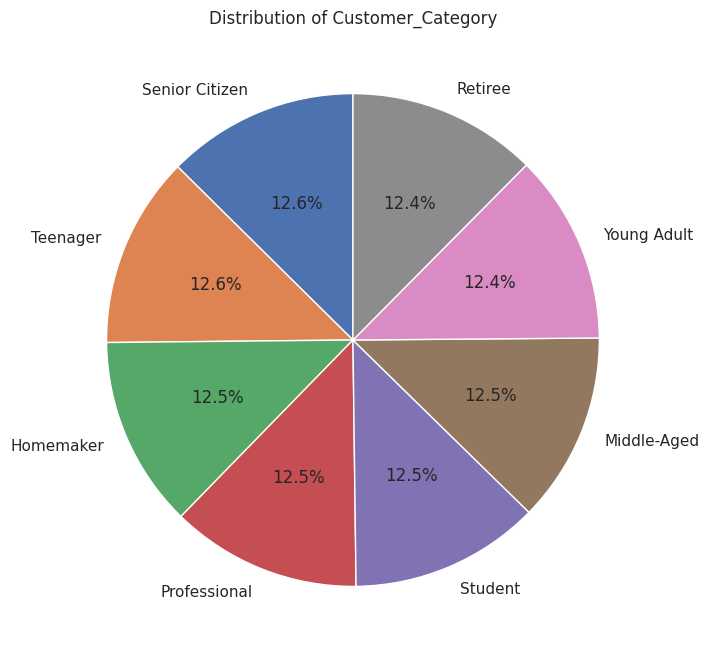

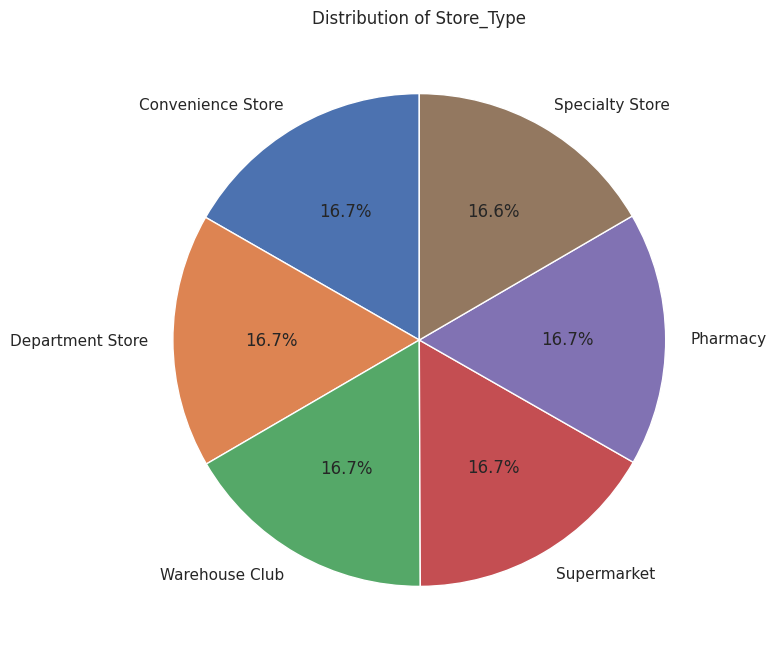

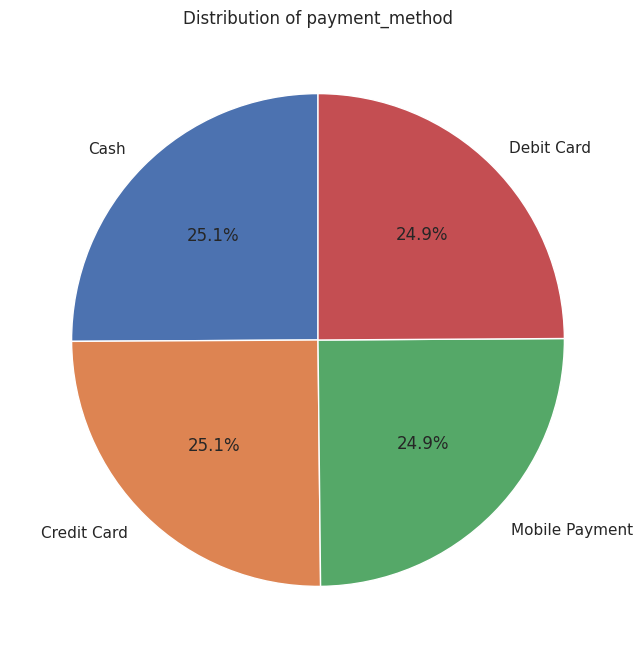

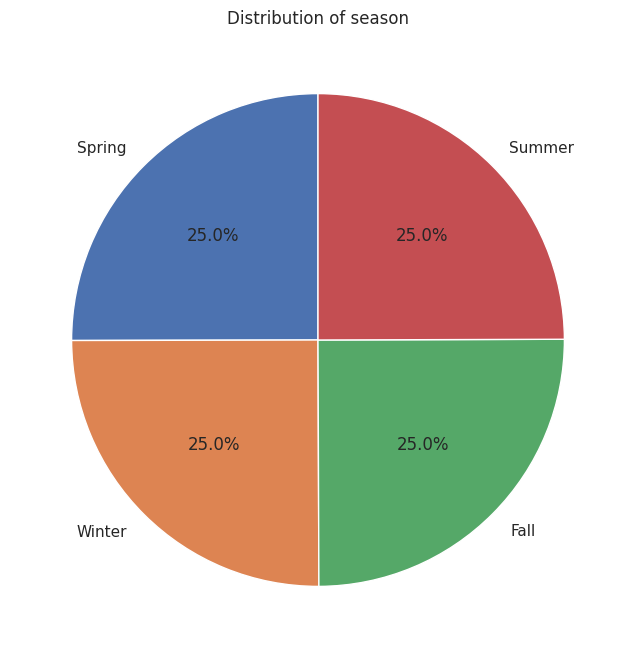

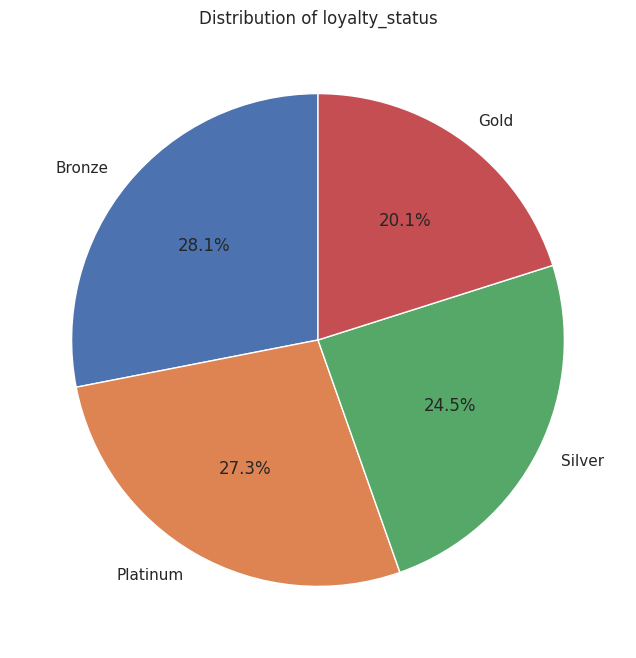

In [32]:
import matplotlib.pyplot as plt

pie_cat_features = [
    "Customer_Category",
    "Store_Type",
    "payment_method",
    "season",
    "loyalty_status"
]

for col in pie_cat_features:
    plt.figure(figsize=(8, 8))

    counts = df[col].value_counts()


    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)

    plt.title(f"Distribution of {col}")

    plt.ylabel('')

    plt.show()

## Analyze Revenue by Customer Category

### Subtask:
Calculate and plot the total revenue (sum of `total_cost`) for each `Customer_Category`.


**Reasoning**:
First, I'll group the DataFrame by 'Customer_Category' and calculate the sum of 'total_cost' for each category to get the total revenue. Then, I will plot a bar chart to visualize this data, making sure to include a title and axis labels for clarity.



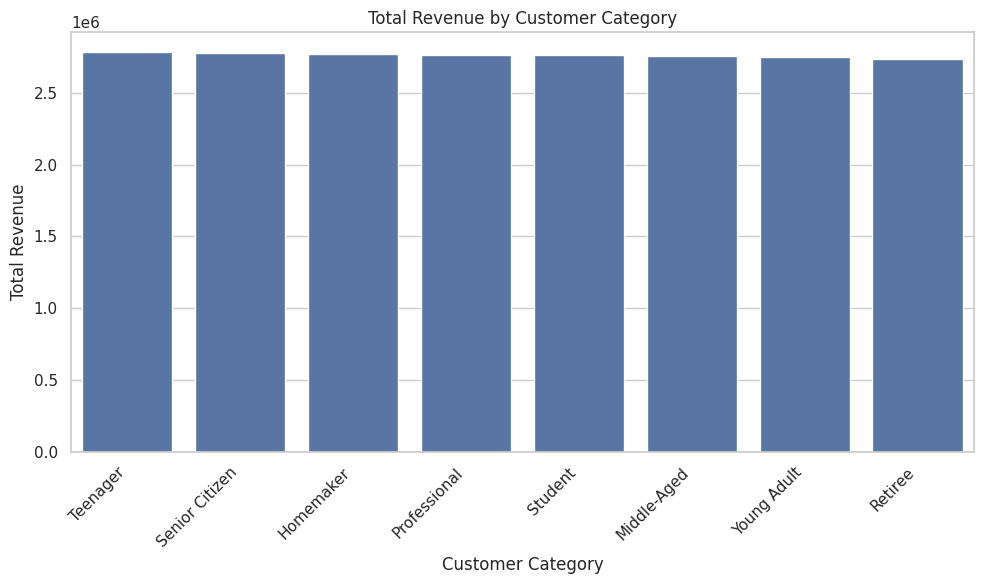

In [33]:
revenue_by_customer_category = df.groupby('Customer_Category')['total_cost'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_customer_category.index, y=revenue_by_customer_category.values)
plt.title('Total Revenue by Customer Category')
plt.xlabel('Customer Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze Revenue by Store Type

### Subtask:
Calculate and plot the total revenue (sum of `total_cost`) for each `Store_Type`. This analysis will show which types of stores are generating the highest revenue.


**Reasoning**:
First, I'll group the DataFrame by 'Store_Type' and calculate the sum of 'total_cost' for each category to get the total revenue. Then, I will plot a bar chart to visualize this data, making sure to include a title and axis labels for clarity.



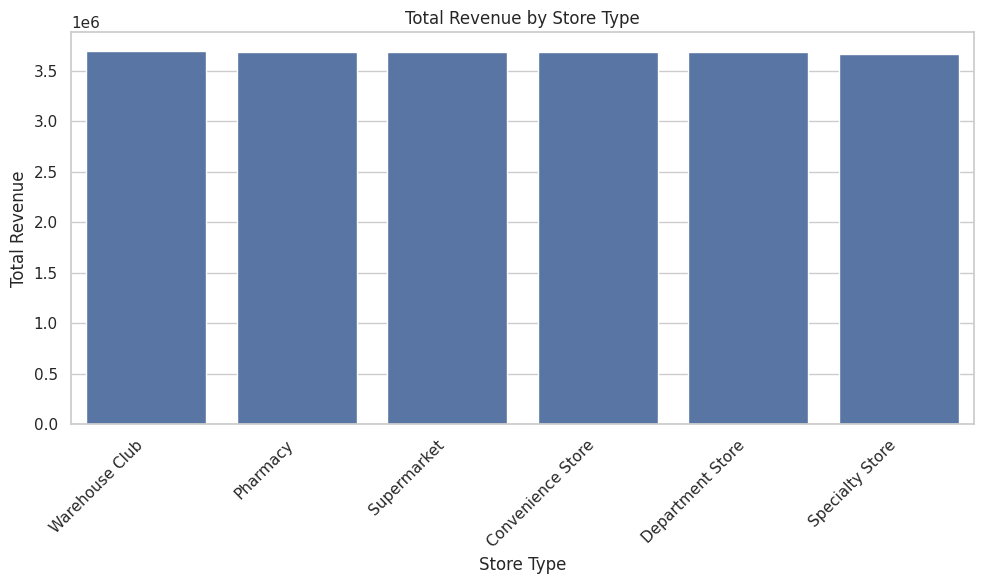

In [34]:
revenue_by_store_type = df.groupby('Store_Type')['total_cost'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_store_type.index, y=revenue_by_store_type.values)
plt.title('Total Revenue by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze Revenue by Promotion Type

### Subtask:
Calculate and plot the total revenue (sum of `total_cost`) associated with each `Promotion` type. This will help in understanding the revenue impact of different promotional strategies.


**Reasoning**:
First, I'll group the DataFrame by 'Promotion' and calculate the sum of 'total_cost' for each promotion type to get the total revenue. Then, I will plot a bar chart to visualize this data, making sure to include a title and axis labels for clarity. Lastly, I will rotate the x-axis labels to avoid overlap and improve readability.



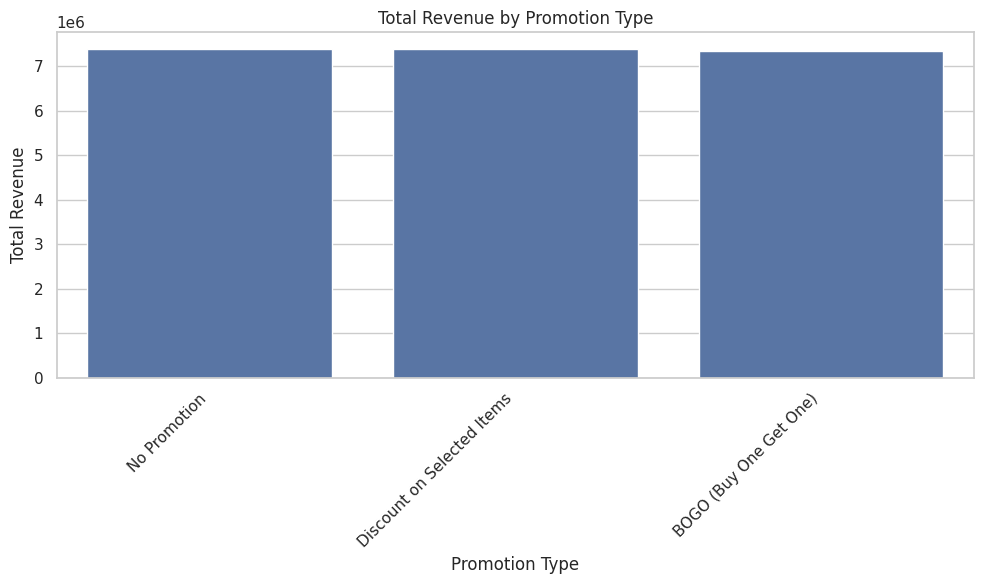

In [35]:
revenue_by_promotion = df.groupby('Promotion')['total_cost'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_promotion.index, y=revenue_by_promotion.values)
plt.title('Total Revenue by Promotion Type')
plt.xlabel('Promotion Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Initial Hypotheses

Based on the initial data exploration, including descriptive statistics, distribution plots, and revenue analysis, the following hypotheses are formulated:

1.  **Customer Purchasing Behavior**:
    *   **H1.1**: `Teenagers`, `Senior Citizens`, and `Homemakers` are key customer categories that contribute significantly more to total revenue, suggesting they either make more frequent purchases or have higher average transaction values. This could be due to specific product preferences or lifestyle factors.
    *   **H1.2**: Customers with `Platinum` and `Bronze` loyalty statuses tend to have a higher `total_cost` per transaction. This indicates that loyalty programs are effective in retaining high-spending customers and that even entry-level loyalty can drive significant spending.
    *   **H1.3**: The application of a discount (`discount_applied = True`) generally correlates with a higher `total_cost` per transaction. This suggests that discounts encourage customers to make larger purchases or buy more items.

2.  **Store Performance**:
    *   **H2.1**: `Warehouse Clubs`, `Pharmacies`, and `Supermarkets` are the top-performing `Store_Type`s in terms of total revenue, indicating their business models or product offerings are highly effective. This might be due to a combination of high foot traffic and competitive pricing.
    *   **H2.2**: Cities like `San Francisco`, `Boston`, and `Chicago` generate the highest total revenue. These cities likely represent strong markets with a large customer base or higher purchasing power.

3.  **Effectiveness of Promotions**:
    *   **H3.1**: "No Promotion" appears to contribute the highest total revenue, but this result is potentially skewed due to null values being imputed as 'No Promotion'. Further analysis is needed to determine the true revenue impact of specific promotional strategies like 'Discount on Selected Items' and 'BOGO (Buy One Get One)'. It's hypothesized that effective promotions do increase total cost.

4.  **Other Relevant Business Insights**:
    *   **H4.1**: `Mobile Payment` methods might be associated with higher total costs, suggesting a preference among higher-spending customers for this payment method or its convenience for larger transactions.
    *   **H4.2**: The numerical data, such as `unit_price`, `line_gross_amount`, `line_net_amount`, `total_items`, and `total_cost`, shows a relatively uniform distribution, indicating a diverse range of product pricing and transaction values without extreme concentrations at specific price points.
    *   **H4.3**: The observed average difference of approximately $30 between `total_cost` and `line_net_amount` per transaction (`line_check["difference"]`) requires further investigation. This discrepancy could indicate additional charges (e.g., shipping, taxes) or an issue with how the `line_net_amount` or `total_cost` is calculated or aggregated in the dataset.

## Final Findings




### Data Analysis Key Findings

*   **Categorical Feature Distributions**: Pie charts were successfully generated to visualize the distributions of `Customer_Category`, `Store_Type`, `payment_method`, `season`, and `loyalty_status`, providing an overview of their proportions within the dataset.
*   **Revenue by Customer Category**: `Teenagers`, `Senior Citizens`, and `Homemakers` were identified as key customer categories contributing significantly to the total revenue.
*   **Revenue by Store Type**: `Warehouse Clubs`, `Pharmacies`, and `Supermarkets` emerged as the top-performing store types in terms of total revenue.
*   **Revenue by Promotion Type**: The "No Promotion" category appeared to contribute the highest total revenue. However, this finding is noted as potentially skewed due to the imputation of null values as 'No Promotion'.
*   **Loyalty Program Effectiveness**: Customers with `Platinum` and `Bronze` loyalty statuses are hypothesized to have a higher total cost per transaction, suggesting the effectiveness of loyalty programs in driving spending.
*   **Impact of Discounts**: The application of a discount is hypothesized to correlate with a higher total cost per transaction, indicating that discounts may encourage larger purchases.
*   **Geographical Performance**: Cities such as `San Francisco`, `Boston`, and `Chicago` were identified as generating the highest total revenue, indicating strong market presence or higher purchasing power in these locations.
*   **Payment Method Trends**: `Mobile Payment` methods are hypothesized to be associated with higher total costs, potentially indicating a preference among higher-spending customers or their convenience for larger transactions.
*   **Numerical Discrepancy**: A consistent average difference of approximately \$30 was observed between `total_cost` and `line_net_amount` per transaction, which requires further investigation.



First, I will identify the numerical features and categorical features from the DataFrame. This is a prerequisite step before performing one-hot encoding and splitting the data into features (X) and target (y).



In [36]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'total_cost' in numerical_cols:
    numerical_cols.remove('total_cost')

categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['transaction_id', 'customer_id', 'store_id', 'promotion_id', 'product_id', 'quantity', 'unit_price', 'line_gross_amount', 'line_discount', 'line_net_amount', 'total_items']
Categorical columns: ['transaction_date', 'Customer_Name', 'Customer_Category', 'City', 'Store_Type', 'Promotion', 'product_name', 'payment_method', 'season', 'loyalty_status']


**Reasoning**:
Now that the numerical and categorical columns have been identified, the next step is to apply one-hot encoding to the categorical features, combine them with the numerical features to form the feature matrix `X`, and define the target variable `y` as 'total_cost'.



In [37]:
import pandas as pd

categorical_cols_for_ohe = [col for col in categorical_cols if col not in ['transaction_date', 'Customer_Name', 'product_name']]

X_categorical = pd.get_dummies(df[categorical_cols_for_ohe], drop_first=True)

X = pd.concat([df[numerical_cols], X_categorical], axis=1)

y = df['total_cost']

print("Shape of X (features):".format(X.shape))
print("Shape of y (target):".format(y.shape))


Shape of X (features):
Shape of y (target):


**Reasoning**:
The print statements for the shapes of X and y were incorrect in the previous execution. I will correct them to properly display the shapes. This step completes the subtask of preparing the feature matrix X and the target variable y.



In [38]:
import pandas as pd

categorical_cols_for_ohe = [col for col in categorical_cols if col not in ['transaction_date', 'Customer_Name', 'product_name']]

X_categorical = pd.get_dummies(df[categorical_cols_for_ohe], drop_first=True)

X = pd.concat([df[numerical_cols], X_categorical], axis=1)

y = df['total_cost']

print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

Shape of X (features): (421429, 43)
Shape of y (target): (421429,)


In [40]:
df = df.drop_duplicates(subset=["transaction_id"])
